# S09T01 - Practicant amb training i test sets
Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

## - Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

### <font color='blue'>- Loading and cleaning the dataset

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#loading the data
delays = pd.read_csv(r'DelayedFlights.csv')

#cleaning the dataframe from NaNs and irrelevant attributes
cols = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
drp = ['Unnamed: 0','FlightNum','TailNum']
delays.drop(columns=drp, inplace=True, axis=1)
delays[cols]= delays[cols].fillna(0)
delays.dropna(inplace=True) 
print(delays.shape)
delays.isna().sum()

(1928371, 27)


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [186]:
#creating the target column, with all delays
delays["TotalDelay"] = delays[cols].sum(axis=1)

#splitting train and test
train, test = train_test_split(delays, test_size=0.33, random_state=42)

<font color='blue'>Let's study each group by separate:
    
### - Train set:

In [187]:
train.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
count,1292008.0,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1292008.0,1292008.0,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06,1.292008e+06
mean,2008.0,6.107818e+00,1.575329e+01,3.987002e+00,1.518911e+03,1.467968e+03,1.610646e+03,1.634392e+03,1.332178e+02,1.341165e+02,1.081991e+02,4.220944e+01,4.310816e+01,7.642805e+02,6.805949e+00,1.821269e+01,0.0,0.0,1.243235e+01,2.403644e+00,9.688366e+00,5.870320e-02,1.637243e+01,4.095549e+01
std,0.0,3.479971e+00,8.774204e+00,1.995765e+00,4.503921e+02,4.247448e+02,5.478406e+02,4.646121e+02,7.201777e+01,7.118914e+01,6.859868e+01,5.677475e+01,5.327633e+01,5.734200e+02,5.251331e+00,1.429837e+01,0.0,0.0,3.628217e+01,1.740041e+01,2.800981e+01,1.655353e+00,3.596668e+01,5.745866e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.901000e+03,1.816000e+03,2.031000e+03,2.015000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02,8.000000e+00,2.100000e+01,0.0,0.0,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01,5.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.453000e+03,2.467000e+03,4.962000e+03,2.000000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,2.453000e+03


In [188]:
test.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
count,636363.0,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.0,636363.0,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000
mean,2008.0,6.107929,15.749580,3.980931,1518.114450,1467.209476,1609.421558,1633.799663,133.484730,134.362510,108.435549,42.180479,43.058258,766.305015,6.822432,18.226750,0.0,0.0,12.356751,2.380140,9.777225,0.057514,16.348736,40.920366
std,0.0,3.482343,8.781368,1.996625,450.522624,424.693885,548.325898,464.661801,72.145588,71.322902,68.731487,56.804986,53.245044,574.828228,5.301821,14.328689,0.0,0.0,36.045410,17.330325,28.412414,1.569295,35.827480,57.492508
min,2008.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,15.000000,1.000000,0.000000,-66.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,1203.000000,1135.000000,1316.000000,1325.000000,80.000000,82.000000,58.000000,9.000000,12.000000,338.000000,4.000000,10.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1545.000000,1510.000000,1715.000000,1705.000000,116.000000,117.000000,90.000000,24.000000,24.000000,606.000000,6.000000,14.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
75%,2008.0,9.000000,23.000000,6.000000,1900.000000,1815.000000,2030.000000,2014.000000,165.000000,165.000000,137.000000,56.000000,53.000000,998.000000,8.000000,21.000000,0.0,0.0,10.000000,0.000000,6.000000,0.000000,18.000000,56.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,750.000000,660.000000,733.000000,2461.000000,2457.000000,4962.000000,240.000000,383.000000,0.0,0.0,1951.000000,1297.000000,1289.000000,254.000000,1254.000000,2461.000000


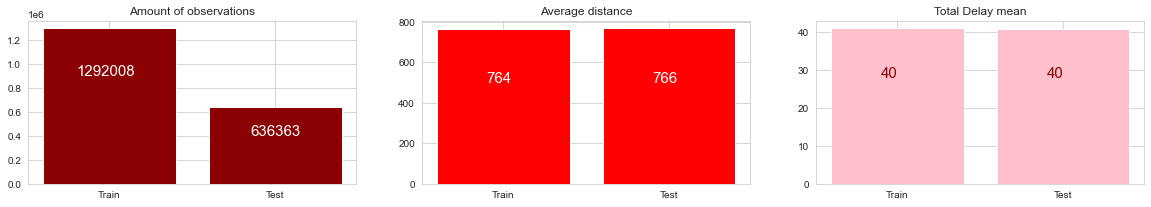

In [189]:
plt.figure(figsize=(20, 3))

#amount of observations per set
plt.subplot(131)
plt.bar(["Train","Test"], [train.Year.count(), test.Year.count()], color='darkred')
plt.title("Amount of observations")
plt.annotate(int(train.Year.count()), (-0.2,900000), color='white', size=15)
plt.annotate(int(test.Year.count()), (0.85,400000), color='white', size=15)

#average distance per set
plt.subplot(132)
plt.bar(["Train","Test"], [train.Distance.mean(), test.Distance.mean()], color='red')
plt.title("Average distance")
plt.annotate(int(train.Distance.mean()), (-0.1,500), color='white', size=15)
plt.annotate(int(test.Distance.mean()), (0.9,500), color='white', size=15)

#average Total delay per set
plt.subplot(133)
plt.bar(["Train","Test"], [train.TotalDelay.mean(), test.TotalDelay.mean()], color='pink')
plt.title("Total Delay mean")
plt.annotate(int(train.TotalDelay.mean()), (-0.1,28), color='darkred', size=15)
plt.annotate(int(test.TotalDelay.mean()), (0.9,28), color='darkred', size=15)
plt.show()

<font color='blue'>Based on the despcriptions and plots comparing the Training set and the Test set, we can confirm there's similarity in the data. Taking the distance and delay time as samples, we can see how the means are very close to each other. The only difference is the amount of observations in each set, since we decided the Test set would have 33% of the data (and it has 6.3M), while the Train set does have the rest of the data (1.29M). We can conclude that the Train-Test split was successfull.

## - Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

<font color='blue'>Let's start by reducing irrelevant columns and separating the parameters into numeric and categorical. We'll also apply the following techniques to improve the data quality:
   - Sampling
   - Binning (numerical-time parameters)
   - Dummies (categorical parameters)
   - Standarize (numerical)
   - PCA (all parameters)
    

### - Binning and cleaning columns  & sampling

In [190]:
#dropping irrelevant columns
delays.drop(columns=["Year",'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], 
            axis=1, inplace=True)

#converting some numerical columns into categorical
dayOfWeek={0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
delays['DayOfWeek'] = delays['DayOfWeek'].map(dayOfWeek)
delays['Month'] = pd.qcut(delays['Month'], [0, 0.25, 0.5, 0.75, 1], labels=['1Q', '2Q', '3Q', '4Q'])
delays['DayofMonth'] = pd.qcut(delays['DayofMonth'], [0, 0.33, 0.66, 1], labels=['1-10', '11-20', '20-31'])
delays['DepTime'] = pd.qcut(delays['DepTime'], [0, 0.33, 0.66, 1], labels=['Morning', 'Afternoon', 'Evening'])
delays['CRSDepTime'] = pd.qcut(delays['CRSDepTime'], [0, 0.33, 0.66, 1], labels=['Morning', 'Afternoon', 'Evening'])
delays['ArrTime'] = pd.qcut(delays['ArrTime'], [0, 0.33, 0.66, 1], labels=['Morning', 'Afternoon', 'Evening'])
delays['CRSArrTime'] = pd.qcut(delays['CRSArrTime'], [0, 0.33, 0.66, 1], labels=['Morning', 'Afternoon', 'Evening'])

#replacing negative numbers with 0
delays['ArrDelay'][delays['ArrDelay']<0] = 0
delays['CRSElapsedTime'][delays['CRSElapsedTime']<0] = 0

#differentiating numerical and categorical columns
nums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nums = delays.select_dtypes(include=nums).columns
print(nums)
cats = delays.loc[:, ~delays.columns.isin(nums)].columns
print(cats)

pd.set_option('max_columns', None)

#simple sampling
sample_size=500000
delays_s=delays.sample(sample_size, random_state=42)
delays_s.sample(5, random_state=42)

/var/folders/xh/mkk0g6yn1sb9xntn6w3ggpvw0000gp/T/ipykernel_3226/1266509340.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['ArrDelay'][delays['ArrDelay']<0] = 0
/var/folders/xh/mkk0g6yn1sb9xntn6w3ggpvw0000gp/T/ipykernel_3226/1266509340.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['CRSElapsedTime'][delays['CRSElapsedTime']<0] = 0


Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted',
       'TotalDelay'],
      dtype='object')
Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'Origin', 'Dest', 'CancellationCode'],
      dtype='object')


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,TotalDelay
319007,1Q,20-31,Wednesday,Afternoon,Afternoon,Afternoon,Afternoon,NW,172.0,188.0,142.0,0.0,9.0,FLL,DTW,1127,10.0,20.0,0,N,0,0.0
1744576,4Q,11-20,Tuesday,Afternoon,Evening,Evening,Evening,WN,189.0,175.0,165.0,21.0,7.0,HOU,PHX,1020,11.0,13.0,0,N,0,21.0
393817,1Q,11-20,Wednesday,Evening,Evening,Evening,Evening,WN,51.0,55.0,37.0,84.0,88.0,AUS,DAL,189,4.0,10.0,0,N,0,84.0
1035816,2Q,11-20,Thursday,Afternoon,Afternoon,Afternoon,Afternoon,9E,128.0,105.0,84.0,60.0,37.0,MEM,CLT,512,5.0,39.0,0,N,0,60.0
128984,1Q,1-10,Friday,Evening,Evening,Morning,Evening,MQ,60.0,65.0,34.0,32.0,37.0,JFK,BOS,187,6.0,20.0,0,N,0,32.0


### <font color='blue'>- Dummies

In [191]:
#dummy creation
dummy = pd.get_dummies(delays_s[cats])

#concatenate to the main dataset
delays_s_d = pd.concat([delays_s,dummy], axis=1)
delays_s_d.drop(columns=cats, inplace=True, axis=1)
print(delays_s_d.shape)
delays_s_d.sample(5, random_state=42)

(500000, 658)


,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,TotalDelay,Month_1Q,Month_2Q,Month_3Q,Month_4Q,DayofMonth_1-10,DayofMonth_11-20,DayofMonth_20-31,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DepTime_Morning,DepTime_Afternoon,DepTime_Evening,CRSDepTime_Morning,CRSDepTime_Afternoon,CRSDepTime_Evening,ArrTime_Morning,ArrTime_Afternoon,ArrTime_Evening,CRSArrTime_Morning,CRSArrTime_Afternoon,CRSArrTime_Evening,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_T

### <font color = 'blue'>- Standarize

In [192]:
from sklearn.preprocessing import StandardScaler

#initialize the scaler
ss = StandardScaler()

nums = list(nums)
nums.remove("ArrDelay")
#Fit the data using the scaler (scale the data)
Xstd = ss.fit_transform(delays_s_d[nums].values)
print(Xstd.mean(), Xstd.std())

#update the dataframe with the standarized data
delays_s_d[nums] = Xstd
delays_s_d.head()

['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'TotalDelay']
1.1397105481592007e-18 0.8944271909999156


,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,TotalDelay,Month_1Q,Month_2Q,Month_3Q,Month_4Q,DayofMonth_1-10,DayofMonth_11-20,DayofMonth_20-31,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DepTime_Morning,DepTime_Afternoon,DepTime_Evening,CRSDepTime_Morning,CRSDepTime_Afternoon,CRSDepTime_Evening,ArrTime_Morning,ArrTime_Afternoon,ArrTime_Evening,CRSArrTime_Morning,CRSArrTime_Afternoon,CRSArrTime_Evening,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_T

### <font color='blue'>- PCA    
<font color='blue'>Let's see if we can reduce the dimensions of the dataframe from the current 662 using PCA. We'll take a sample of the population in order to make it easier to the computer to process it:

In [193]:
from sklearn.decomposition import PCA

# Separating out the target
target = delays_s_d.loc[:,["ArrDelay"]].values
delays_s_d.drop(["ArrDelay","TotalDelay"], inplace=True, axis=1)

# Separating out the features
delays_s_d_p = delays_s_d.values

Text(90, 0.22, 'V')

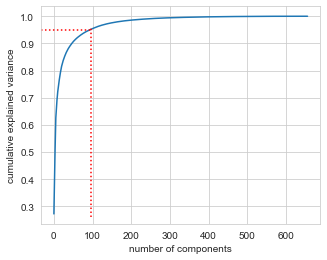

In [194]:
plt.figure(figsize=(5,4))
pca = PCA().fit(delays_s_d_p)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.95, 0 ,0.18, ls=':', c='red')    # minimum variance
plt.axvline(96, 0.03 ,0.90, ls=':', c='red')    # minimum variance
plt.annotate("V", xy=(90,0.22), color='red')

<font color='blue'>We can observe that if we want to keep at least 95% of the variance, after applying PCA we should have close to 100 parameters intact. Let's see if we get the same result after PCA:

In [195]:
pca = PCA(.95)
pca.fit(delays_s_d_p)
print("Number of components: ", pca.n_components_ )
print("Variance ratio: ", pca.explained_variance_ratio_.sum())

Number of components:  94
Variance ratio:  0.9501462754673587


<font color='blue'>In fact, PCA reduced the dimensionality from 658 to only 94 parameters! Let's apply the reduction as its undoubtedly helpful.

In [196]:
#applying pca
principalComponents = pca.transform(delays_s_d_p)
new_cols = []
for i in range(pca.n_components_ ):
    i+=1
    new_cols.append("PC"+str(i))
delays_s_d_p = pd.DataFrame(data = principalComponents)#, columns = new_cols)

#adding the target column to the dataset
delays_s_d_p['ArrDelay'] = target
print(delays_s_d_p.shape)
delays_s_d_p.head()

(500000, 95)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,ArrDelay
0,-2.076487,-1.568829,0.311164,-0.906489,0.401158,-0.119008,-0.227369,-0.787001,0.805674,0.252907,-0.107430,0.119064,0.571333,0.437069,0.052468,0.457916,0.787757,0.041987,-0.238768,0.012880,-0.090188,0.064219,-0.066919,-0.019945,-0.084193,-0.057346,-0.006274,0.013974,-0.007967,0.016186,0.030551,-0.034070,-0.013676,0.031199,0.013747,0.014712,0.030523,-0.018314,-0.049183,0.011310,-0.035148,0.038382,0.005810,-0.011883,-0.008996,-0.015384,-0.006673,0.031222,-0.025820,-0.023388,-0.067687,0.015634,-0.145560,0.017549,0.031881,-0.035639,-0.001760,-0.024057,0.003252,-0.020871,-0.023722,-0.046498,0.047954,0.070198,-0.098377,-0.032162,-0.072582,-0.061955,-0.089793,-0.008937,-0.007236,-0.030268,-0.449073,0.128875,0.070113,0.067345,-0.106876,0.512030,-0.389486,0.481448,-0.192717,-0.109555,0.050243,0.017764,0.132640,-0.122376,0.002079,0.008682,-0.136032,-0.000934,0.016493,-0.244295,-0.022271,0.006945,6.0
1,1.266134,-0.736643,0.569485,0.384669,-0.361336,0.021085,0.750998,0.148082,-0.232730,-0.762997,-0.452125,0.955494,-0.742603,-0.123655,-0.080477,0.120730,0.059406,-0.936087,0.345503,1.110419,-0.524322,-0.072778,0.013575,-0.165319,-0.090136,-0.032507,0.008578,-0.078760,-0.024201,0.002278,0.264819,0.224684,0.197705,-0.225254,0.334081,0.280455,-0.037036,0.009385,-0.053644,0.120247,-0.054846,0.006385,0.077840,-0.010537,0.031632,0.054400,-0.015494,0.054959,0.050014,0.010321,0.006288,-0.001840,-0.036595,-0.008298,-0.015580,-0.063836,-0.022622,0.048368,0.044920,-0.029036,-0.060008,0.009877,0.038876,0.013329,0.075695,0.009003,0.045059,-0.065630,-0.015345,0.013896,0.050439,-0.038993,-0.044176,0.112916,-0.077628,0.090630,-0.044171,-0.044904,0.137425,0.113796,0.034313,-0.062773,0.407294,-0.052309,-0.172321,-0.336248,-0.163471,-0.076558,-0.088742,0.108447,0.008883,0.023580,-0.163682,-0.014252,35.0
2,-0.901676,-1.266685,0.806526,-0.824248,0.361976,-0.264483,-0.719703,0.511573,-0.197520,-0.309912,0.763560,-0.242307,-0.262786,-0.116142,-0.141948,0.046476,0.065495,-0.393596,0.868513,-0.170448,-0.375954,0.124352,-0.052846,0.030821,-0.181475,0.111554,0.387944,-0.699391,-0.160551,0.484906,-0.276319,0.325379,-0.360131,0.003527,0.076066,-0.191869,-0.355424,-0.025108,0.010106,-0.013786,0.002553,0.021913,-0.031695,-0.024743,-0.009326,-0.037091,-0.037878,0.018764,-0.034402,-0.007726,-0.010032,0.015138,-0.026740,-0.021774,0.001717,-0.071487,0.018970,-0.011191,-0.035963,0.035855,-0.000366,0.025669,0.000515,-0.003577,-0.000812,-0.010445,-0.009505,0.010885,0.019112,0.005896,0.009388,0.007872,0.002690,-0.038550,0.021143,0.006299,0.034849,0.016256,-0.009757,-0.018271,-0.001452,0.009481,-0.007157,-0.011909,0.010655,-0.028171,0.021478,0.033871,0.006754,0.005080,-0.014838,-0.018971,0.009893,0.022736,10.0
3,-0.272871,1.105860,-1.040783,-0.789010,-0.467690,-0.217180,-0.557930,0.614003,0.795814,0.224572,0.025812,0.228775,0.350608,0.577227,0.966435,-0.218566,-0.012440,-0.071761,-0.088350,0.063976,0.091792,0.180672,0.054666,-0.122435,-0.021477,-0.010850,-0.085866,-0.113898,-0.024924,0.004036,0.065029,0.201170,0.280630,0.153430,-0.177438,-0.239463,-0.025444,0.586040,-0.441073,0.092869,-0.323652,0.106105,0.158510,-0.033020,-0.276042,0.104759,0.036862,-0.012846,-0.077115,-0.176383,0.740279,0.034304,0.263445,-0.082940,0.027915,-0.099561,0.057083,-0.030393,-0.040601,-0.071493,0.047942,0.063345,-0.005491,-0.004770,0.043291,-0.004529,-0.030658,0.024047,0.012317,-0.006954,0.010365,-0.012431,-0.022328,-0.023950,-0.010044,-0.037922,-0.120623,-0.017217,-0.014942,-0.071792,-0.003893,-0.019082,0.009343,-0.074876,-0.045784,0.009771,-0.061339,0.079142,-0.046721,0.070257,0.021708,-0.022616,0.079700,0.066345,73.0
4,-1.216533,0.557361,-1.131379,-0.188483,-0.098636,0.131314,-0.410172,-0.858516,-0.120570,-0.204336,0.7362

<font color='blue'>Now the dataframe would be ready to pass through any kind of predictive model.

## - Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica. <br>
<font color='blue'>For this exercise we'll recover an old version of the dataframe, specifically the one before the PCA was applied. The reason for that is that if we want to see relationships between parameters it will be easier for us in this format. Moreover, we'll inspect only the numerical attributes, in an aim to keep the exercise simple. Also, the target variable we'll pick is the TotalDelay. Let's see how related are the rest of parameters to this especial variable:

In [176]:
nums.remove("TotalDelay")
print(nums)
delays_s_d[nums].describe()

['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted']


,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.0,500000.0
mean,3.932432e-17,-1.986644e-17,2.312950e-17,-3.230323e-16,8.575873e-17,-2.392630e-15,1.369946e-15,0.0,0.0
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,0.0
min,-1.643593e+00,-1.870904e+00,-1.564302e+00,-6.958049e-01,-1.280318e+00,-1.289117e+00,-1.272401e+00,0.0,0.0
25%,-7.421018e-01,-7.347802e-01,-7.345639e-01,-5.832271e-01,-7.459597e-01,-5.329810e-01,-5.742848e-01,0.0,0.0
50%,-2.428143e-01,-2.438626e-01,-2.687460e-01,-3.580715e-01,-2.777434e-01,-1.549127e-01,-2.950383e-01,0.0,0.0
75%,4.367714e-01,4.293958e-01,4.299808e-01,1.860546e-01,4.028237e-01,2.231555e-01,1.936431e-01,0.0,0.0
max,8.550193e+00,7.372373e+00,9.091282e+00,4.529223e+01,7.302486e+00,4.407907e+01,2.546545e+01,0.0,0.0


<font color='blue'>Let's start by checking how spread is the data of each parameter, and the potential presence of outliers:

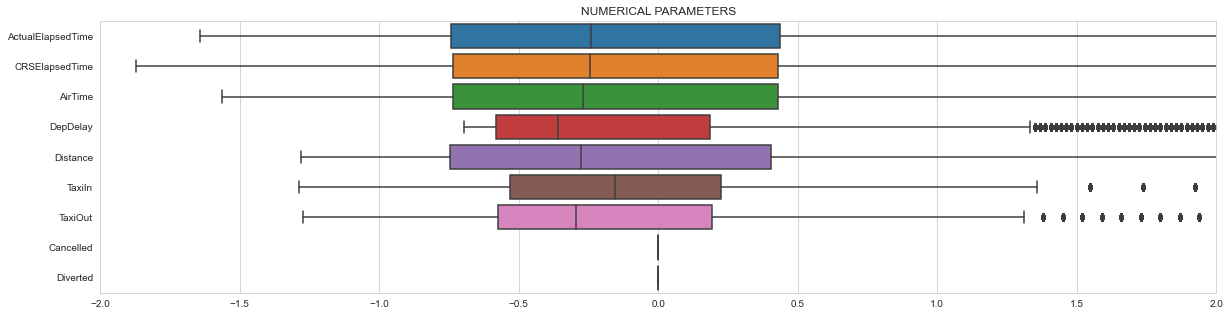

In [177]:
#numerical attributes all together
plt.figure(figsize=(20,5))
plt.title('NUMERICAL PARAMETERS')
sns.boxplot(data=delays_s_d[nums], orient='h');
plt.xlim(-2,2)
plt.show()

<font color='blue'>We can clearly see how the parameters have been normalized and standarized. Nevertheless, there's a high number of outliers that might need reduction as they may be skewing the data distribution to the right too much.

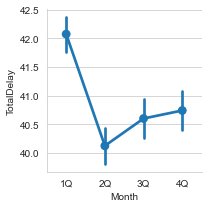

In [178]:
sns.catplot(x="Month", y="TotalDelay", data=delays_s, kind="point", height=3)

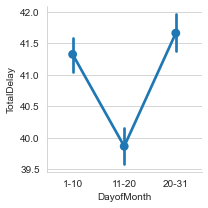

In [179]:
sns.catplot(x="DayofMonth", y="TotalDelay", data=delays_s, kind="point", height=3)

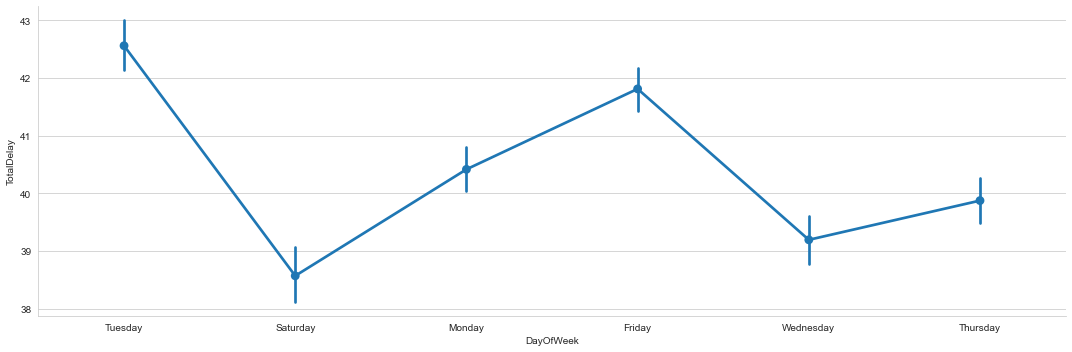

In [180]:
sns.set_style("whitegrid")
sns.catplot(x="DayOfWeek", y="TotalDelay", data=delays_s, kind="point", aspect=3)

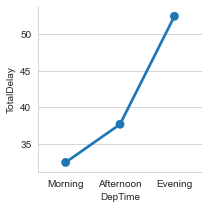

In [181]:
sns.catplot(x="DepTime", y="TotalDelay", data=delays_s, kind="point", height=3)

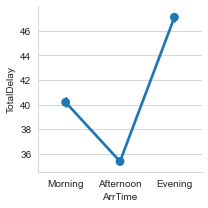

In [182]:
sns.catplot(x="ArrTime", y="TotalDelay", data=delays_s, kind="point", height=3)

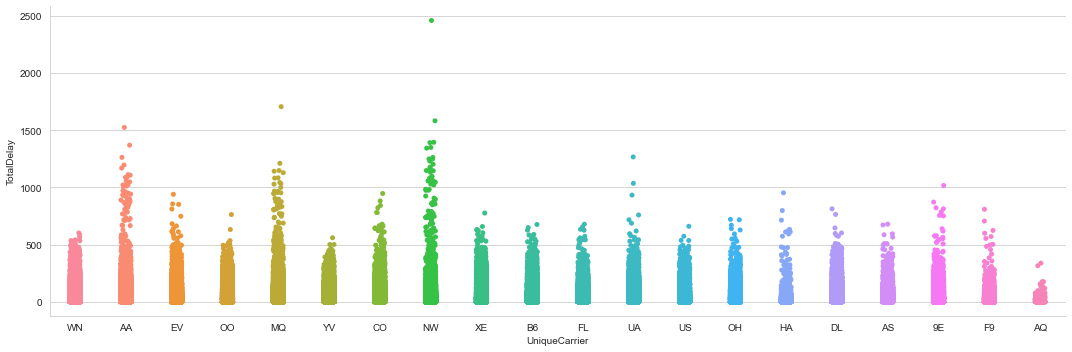

In [183]:
sns.catplot(x="UniqueCarrier", y="TotalDelay", data=delays_s, aspect=3)

In [184]:
# saving the dataframe for next exercise
delays_s_d_p.to_csv('delayed2.csv')